In [36]:
# Importing required libraries:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Feature selection :

In [4]:
# Dataset columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],1)

In [6]:
# Checking the null values present in columns:
dict(df.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'G

In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#Dataset describe:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Need to fill the null values:
m1 = df['LotFrontage'].mode()
df['LotFrontage'] = df['LotFrontage'].fillna(m1)

In [10]:
# we have drop the rows having null values 
df = df.dropna()

In [11]:
# creating the categorical and numerical sets
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

### Vizualisation of dataset

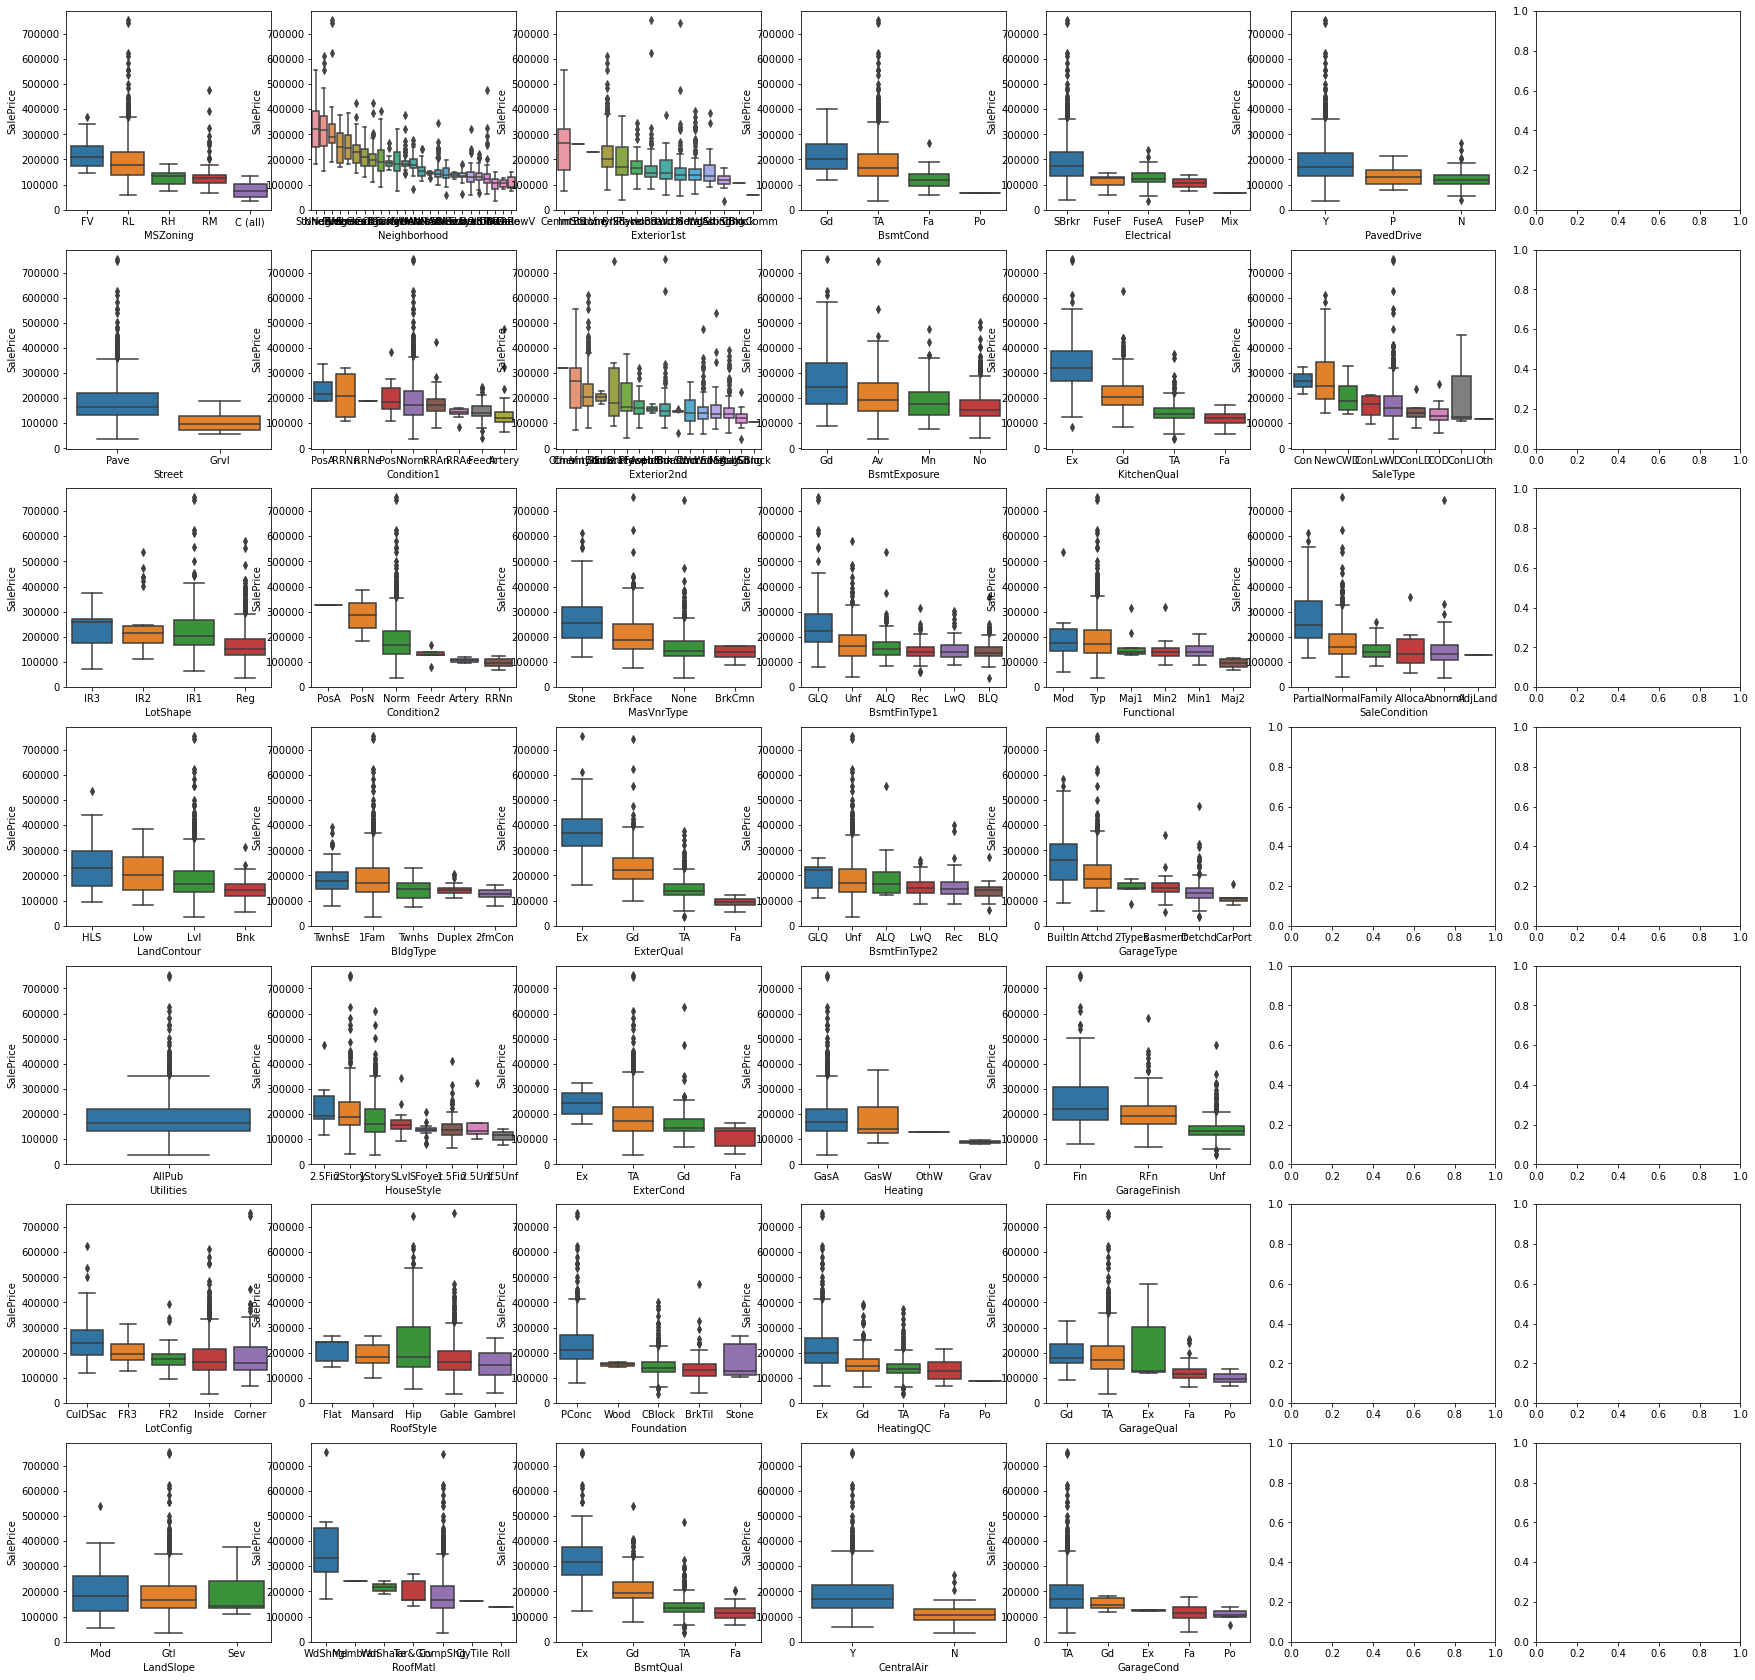

In [12]:
f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    sort_list = sorted(df.groupby(feature)['SalePrice'].median().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = df, x = feature, y = 'SalePrice',  order=order_list, ax=axes[i%7, i//7])

### conclusion:
- Here we can see most of the categorical variables levels are affecting the most .

### Creation of pairplot of numerical variables:

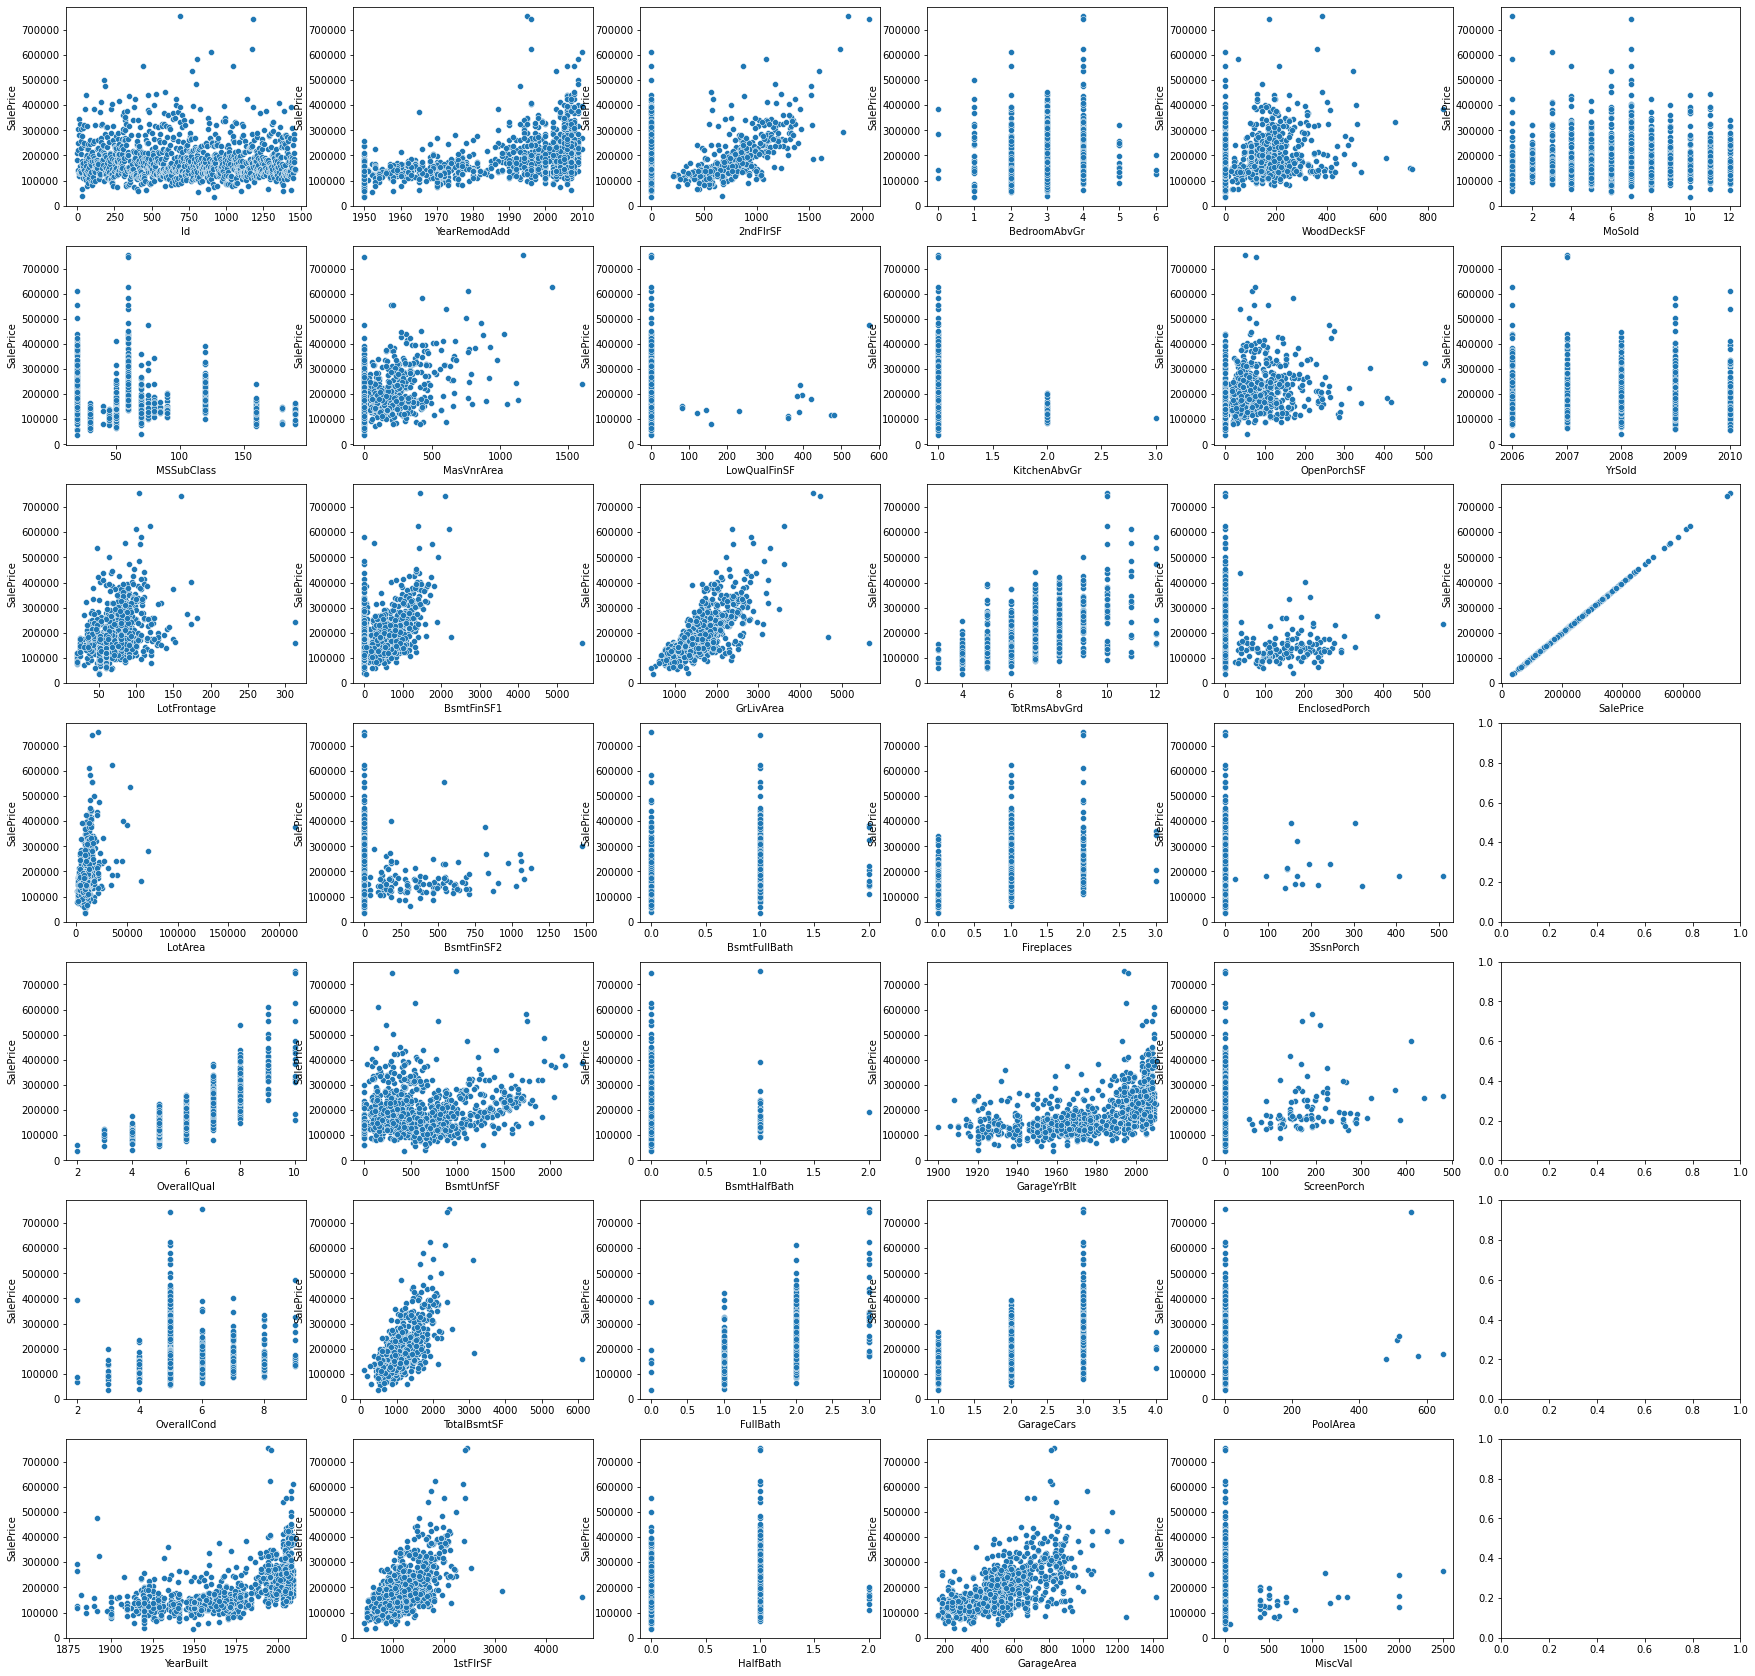

In [13]:
f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

### conclusion:
- we can see in linearity check most of numeric independent variables are having a linear relationship with dependent variables.

### Heatmap for checking the relationship with independent varibales:

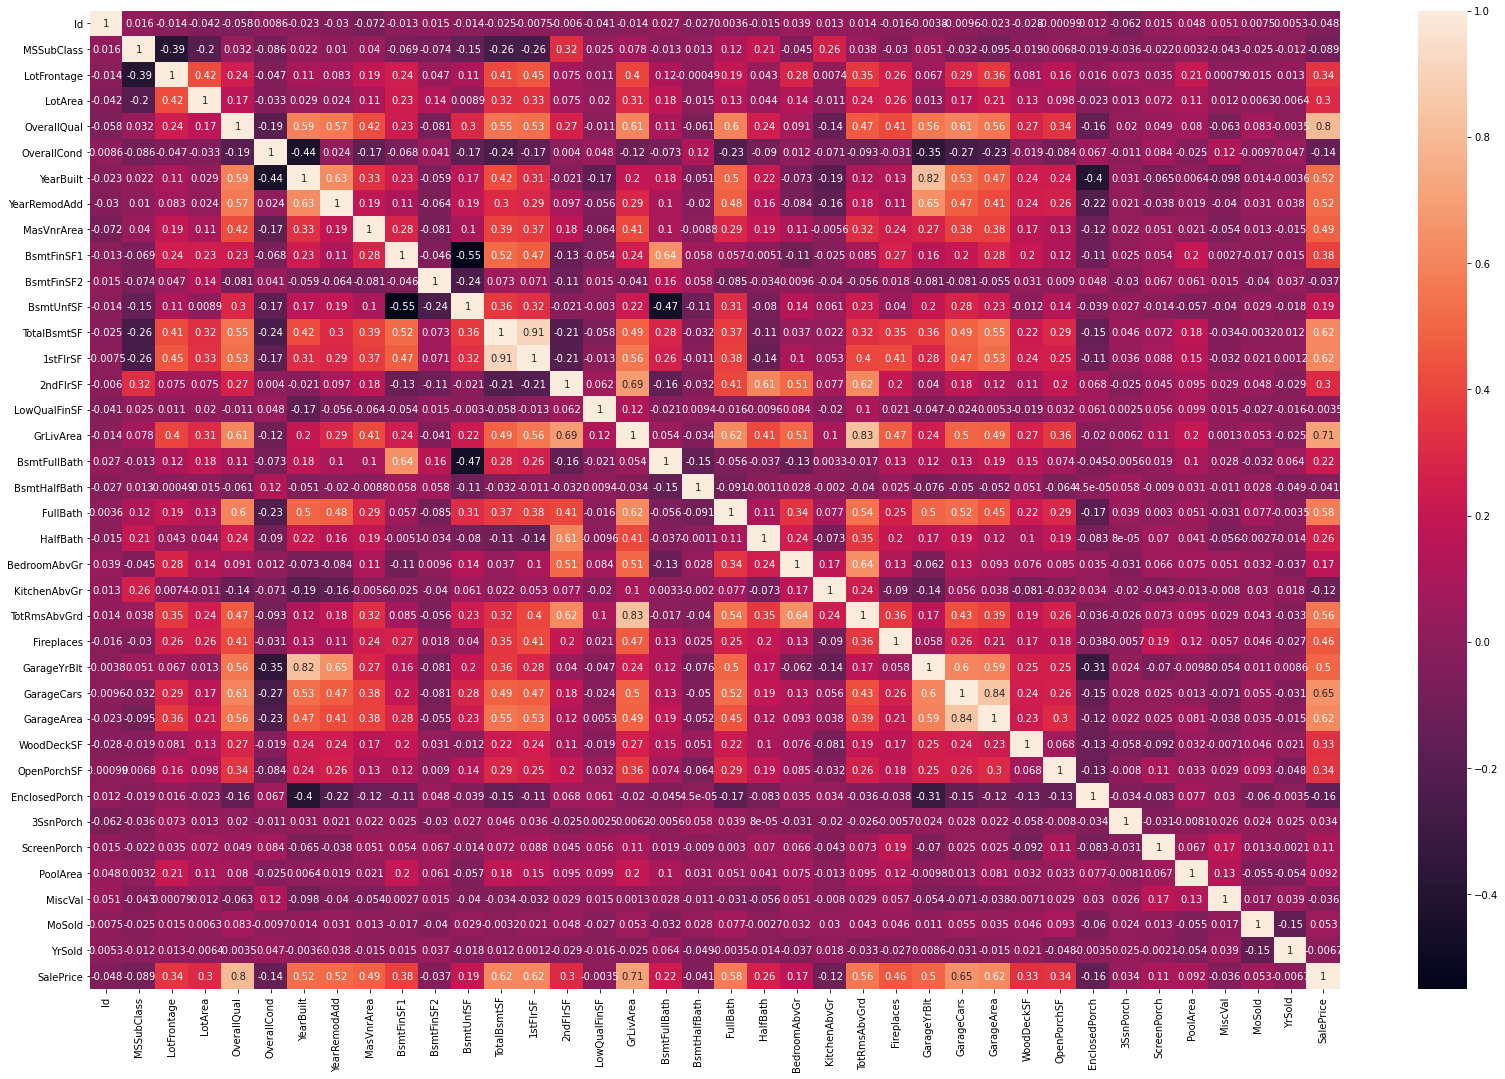

In [14]:
plt.figure(figsize=(28,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

### conclusion:
- In this heatmap we can see overallqual, grlivearea, yearbuilt, totalbsmtssf, 1stfirsf, fullbath, totrmsabvgrd, garagecars, gargearea, yearremodadd, masvrnarea are having good relationship with saleprice.
- But overalqual, gargecars, garagearea, fullbath, marsvrnarea having good reationship with other variables .

### creation of dummy variables

In [15]:
df1 = pd.get_dummies(df['MSZoning'],drop_first=True)
df.drop(['MSZoning'],1,inplace=True)
df = pd.concat([df1,df],1)

df2 = pd.get_dummies(df['LandContour'],drop_first=True)
df.drop(['LandContour'],1,inplace=True)
df = pd.concat([df2,df],1)

df3 = pd.get_dummies(df['LotShape'],drop_first=True)
df.drop(['LotShape'],1,inplace=True)
df = pd.concat([df3,df],1)

df4 = pd.get_dummies(df['Utilities'],drop_first=True)
df.drop(['Utilities'],1,inplace=True)
df = pd.concat([df4,df],1)

df5 = pd.get_dummies(df['LotConfig'],drop_first=True)
df.drop(['LotConfig'],1,inplace=True)
df = pd.concat([df5,df],1)

df6 = pd.get_dummies(df['LandSlope'],drop_first=True)
df.drop(['LandSlope'],1,inplace=True)
df = pd.concat([df6,df],1)

df7 = pd.get_dummies(df['Neighborhood'],drop_first=True)
df.drop(['Neighborhood'],1,inplace=True)
df = pd.concat([df7,df],1)

df8 = pd.get_dummies(df['Condition1'],drop_first=True)
df.drop(['Condition1'],1,inplace=True)
df = pd.concat([df8,df],1)

df9 = pd.get_dummies(df['Condition2'],drop_first=True)
df.drop(['Condition2'],1,inplace=True)
df = pd.concat([df9,df],1)

df0 = pd.get_dummies(df['BldgType'],drop_first=True)
df.drop(['BldgType'],1,inplace=True)
df = pd.concat([df0,df],1)

df10 = pd.get_dummies(df['HouseStyle'],drop_first=True)
df.drop(['HouseStyle'],1,inplace=True)
df = pd.concat([df10,df],1)

df11 = pd.get_dummies(df['RoofStyle'],drop_first=True)
df.drop(['RoofStyle'],1,inplace=True)
df = pd.concat([df11,df],1)

df12 = pd.get_dummies(df['RoofMatl'],drop_first=True)
df.drop(['RoofMatl'],1,inplace=True)
df = pd.concat([df12,df],1)

df13 = pd.get_dummies(df['Exterior1st'],drop_first=True)
df.drop(['Exterior1st'],1,inplace=True)
df = pd.concat([df13,df],1)

df14 = pd.get_dummies(df['Exterior2nd'],drop_first=True)
df.drop(['Exterior2nd'],1,inplace=True)
df = pd.concat([df14,df],1)

df15 = pd.get_dummies(df['MasVnrType'],drop_first=True)
df.drop(['MasVnrType'],1,inplace=True)
df = pd.concat([df15,df],1)

df16 = pd.get_dummies(df['ExterQual'],drop_first=True)
df.drop(['ExterQual'],1,inplace=True)
df = pd.concat([df16,df],1)

df17 = pd.get_dummies(df['ExterCond'],drop_first=True)
df.drop(['ExterCond'],1,inplace=True)
df = pd.concat([df17,df],1)

df18 = pd.get_dummies(df['Foundation'],drop_first=True)
df.drop(['Foundation'],1,inplace=True)
df = pd.concat([df18,df],1)

df19 = pd.get_dummies(df['BsmtQual'],drop_first=True)
df.drop(['BsmtQual'],1,inplace=True)
df = pd.concat([df19,df],1)

df20 = pd.get_dummies(df['BsmtCond'],drop_first=True)
df.drop(['BsmtCond'],1,inplace=True)
df = pd.concat([df20,df],1)

df21 = pd.get_dummies(df['BsmtExposure'],drop_first=True)
df.drop(['BsmtExposure'],1,inplace=True)
df = pd.concat([df21,df],1)

df22 = pd.get_dummies(df['BsmtFinType1'],drop_first=True)
df.drop(['BsmtFinType1'],1,inplace=True)
df = pd.concat([df22,df],1)

df23 = pd.get_dummies(df['BsmtFinType2'],drop_first=True)
df.drop(['BsmtFinType2'],1,inplace=True)
df = pd.concat([df23,df],1)

df24 = pd.get_dummies(df['Heating'],drop_first=True)
df.drop(['Heating'],1,inplace=True)
df = pd.concat([df24,df],1)

df25 = pd.get_dummies(df['HeatingQC'],drop_first=True)
df.drop(['HeatingQC'],1,inplace=True)
df = pd.concat([df25,df],1)

df26 = pd.get_dummies(df['Electrical'],drop_first=True)
df.drop(['Electrical'],1,inplace=True)
df = pd.concat([df26,df],1)

df27 = pd.get_dummies(df['KitchenQual'],drop_first=True)
df.drop(['KitchenQual'],1,inplace=True)
df = pd.concat([df27,df],1)

df28 = pd.get_dummies(df['Functional'],drop_first=True)
df.drop(['Functional'],1,inplace=True)
df = pd.concat([df28,df],1)

df29 = pd.get_dummies(df['GarageType'],drop_first=True)
df.drop(['GarageType'],1,inplace=True)
df = pd.concat([df29,df],1)

df30 = pd.get_dummies(df['GarageFinish'],drop_first=True)
df.drop(['GarageFinish'],1,inplace=True)
df = pd.concat([df30,df],1)

df31 = pd.get_dummies(df['GarageQual'],drop_first=True)
df.drop(['GarageQual'],1,inplace=True)
df = pd.concat([df31,df],1)

df32 = pd.get_dummies(df['GarageCond'],drop_first=True)
df.drop(['GarageCond'],1,inplace=True)
df = pd.concat([df32,df],1)

df33 = pd.get_dummies(df['SaleType'],drop_first=True)
df.drop(['SaleType'],1,inplace=True)
df = pd.concat([df33,df],1)

df34 = pd.get_dummies(df['PavedDrive'],drop_first=True)
df.drop(['PavedDrive'],1,inplace=True)
df = pd.concat([df34,df],1)


df35 = pd.get_dummies(df['SaleCondition'],drop_first=True)
df.drop(['SaleCondition'],1,inplace=True)
df = pd.concat([df35,df],1)

In [16]:
df

,AdjLand,Alloca,Family,Normal,Partial,P,Y,CWD,Con,ConLD,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,0,0,0,1,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,1,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,0,1,0,0,1,0,0,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,0,1,0,0,1,0,0,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,0,1,0,0,1,0,0,0,...,366,0,112,0,0,0,0,4,2010,142125


In [17]:
#Here we replaced our categorical variable into numeric type:
df['Street'] = df['Street'].replace({'Pave':0, 'Grvl':1})
df['CentralAir'] = df['CentralAir'].replace({'Y':1,'N':0})

### Divide the dependent and independent variables:

In [18]:
y = df.pop('SalePrice')

In [19]:
df.drop(['Id'],1,inplace=True)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### standarization of numerical variables

In [20]:
scaler = MinMaxScaler()
col = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

<ipython-input-20-189bfc7c9c61>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = scaler.fit_transform(X_train[col])
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-20-189bfc7c9c61>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [21]:
X_train.describe()

,AdjLand,Alloca,Family,Normal,Partial,P,Y,CWD,Con,ConLD,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.0,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.001307,0.006536,0.016993,0.813072,0.101961,0.020915,0.934641,0.003922,0.0,0.005229,...,0.274237,0.125426,0.087551,0.072368,0.006479,0.036879,0.004557,0.008802,0.484017,0.453922
std,0.036155,0.080633,0.129331,0.390109,0.302795,0.143194,0.247321,0.062540,0.0,0.072168,...,0.152731,0.159077,0.120846,0.198788,0.058812,0.123761,0.063251,0.063039,0.243464,0.333921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.166932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.257552,0.000000,0.053016,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.340223,0.230769,0.126143,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
y_train.shape

(765, 1)

### Feature selection by using rfe with gridsearchcv

In [23]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 222))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X, y)                  


Fitting 5 folds for each of 221 candidates, totalling 1105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

### conclusion:
-please wait for this execution it takes a lot of time i have created this to check how many features are affecting the model.

In [24]:
result = pd.DataFrame(model_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.283200,0.022868,0.004201,0.000402,1,{'n_features_to_select': 1},0.024645,-0.006246,-0.004593,-0.002890,...,0.020147,0.036643,51,0.035147,0.041352,0.037920,0.011211,0.020458,0.029218,0.011481
1,1.308801,0.033004,0.004799,0.001166,2,{'n_features_to_select': 2},0.024683,0.046064,0.027342,0.324226,...,0.070500,0.133134,49,0.038390,0.145804,0.143023,0.412925,0.034908,0.155010,0.137676
2,1.289401,0.010174,0.005198,0.001166,3,{'n_features_to_select': 3},0.038106,0.046031,0.034121,0.314046,...,0.062363,0.140308,50,0.059557,0.149155,0.161739,0.413674,0.086150,0.174055,0.125719
3,1.290598,0.013835,0.003800,0.000400,4,{'n_features_to_select': 4},0.388581,0.047346,0.306916,0.387201,...,0.201896,0.204002,48,0.329636,0.180029,0.397773,0.537032,0.089446,0.306783,0.158189
4,1.283999,0.019577,0.004200,0.000399,5,{'n_features_to_select': 5},0.388669,0.056585,0.306961,0.387126,...,0.211832,0.189958,47,0.330030,0.185133,0.398223,0.538386,0.101996,0.310753,0.154402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.074400,0.005443,0.004799,0.000401,217,{'n_features_to_select': 217},0.258889,0.867389,0.447955,0.583709,...,0.593809,0.226102,27,0.946031,0.937228,0.930702,0.943166,0.934358,0.938297,0.005619
217,0.062800,0.004706,0.004800,0.000401,218,{'n_features_to_select': 218},0.258889,0.867485,0.447955,0.574185,...,0.594512,0.228795,26,0.946031,0.937229,0.930702,0.946312,0.935709,0.939197,0.006091
218,0.047001,0.002452,0.005400,0.001357,219,{'n_features_to_select': 219},0.258889,0.876391,0.447955,0.574152,...,0.596286,0.230938,23,0.946031,0.938601,0.930702,0.946313,0.935709,0.939471,0.006027
219,0.037400,0.005084,0.004800,0.000400,220,{'n_features_to_select': 220},0.258889,0.876391,0.447955,0.574152,...,0.596286,0.230938,24,0.946031,0.938601,0.930702,0.946313,0.935709,0.939471,0.006027


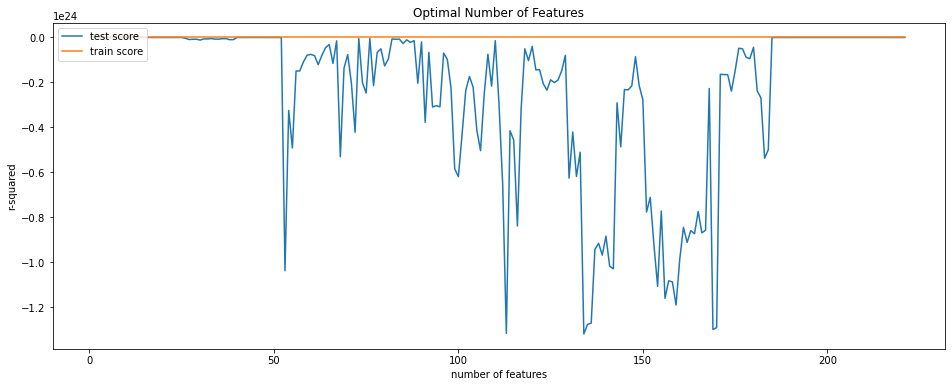

In [25]:
plt.figure(figsize=(16,6))

plt.plot(result["param_n_features_to_select"], result["mean_test_score"])
plt.plot(result["param_n_features_to_select"], result["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### conclusion:
- Here we can see mean train score have one constant accuracy, but mean test score is in zigzag way most of places according to the number of variables ,here its getting overfit so the mean test error is showing like this.
- if we create a model by taking 50 variables it doesn't goes overfit and we can create a simple model.

### Linear regression

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [27]:
r2_score = r2_score(y_train_pred,y_train)
r2_score

0.9487053561619103

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_pred, y_test)
r2

-0.00811348244508392

### conclusion:
- In this linear regression model is totally overfit so the train score is much higher than the test score.

### using rfe the linear regression:

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=50)

In [30]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('AdjLand', True, 1),
 ('Alloca', False, 133),
 ('Family', False, 38),
 ('Normal', False, 114),
 ('Partial', False, 39),
 ('P', False, 121),
 ('Y', False, 164),
 ('CWD', False, 37),
 ('Con', True, 1),
 ('ConLD', False, 49),
 ('ConLI', False, 67),
 ('ConLw', False, 99),
 ('New', False, 107),
 ('Oth', True, 1),
 ('WD', False, 165),
 ('Fa', True, 1),
 ('Gd', True, 1),
 ('Po', True, 1),
 ('TA', True, 1),
 ('Fa', True, 1),
 ('Gd', True, 1),
 ('Po', True, 1),
 ('TA', True, 1),
 ('RFn', False, 172),
 ('Unf', False, 162),
 ('Attchd', False, 138),
 ('Basment', False, 64),
 ('BuiltIn', False, 160),
 ('CarPort', False, 81),
 ('Detchd', False, 115),
 ('Maj2', False, 157),
 ('Min1', False, 76),
 ('Min2', False, 77),
 ('Mod', False, 79),
 ('Typ', False, 56),
 ('Fa', False, 3),
 ('Gd', True, 1),
 ('TA', True, 1),
 ('FuseF', False, 167),
 ('FuseP', False, 122),
 ('Mix', True, 1),
 ('SBrkr', False, 169),
 ('Fa', False, 95),
 ('Gd', False, 119),
 ('Po', False, 100),
 ('TA', False, 117),
 ('GasW', False

In [31]:
col = X_train.columns[rfe.support_]

In [32]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [33]:
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
y_test_pred = lm.predict(X_test_rfe)

In [34]:
r2_score = r2_score(y_train_pred, y_train)
r2_score

0.9081213488449682

In [37]:
r2 = r2_score(y_test_pred, y_test)
r2

-0.013572290348621507

### conclusion:
- here also we can see that the model gets overfit .

### Ridge Regression

In [41]:
alpha = [1,0.1,0.001,0.0001,10,100]
train_score = []
test_score = []
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_score.append(r2_score(y_train_pred,y_train))
    test_score.append(r2_score(y_test_pred, y_test))
    print(ridge.coef_)
print(train_score)
print(test_score)

[[ 1.68920565e-02  7.25502910e-03 -9.54777742e-03  8.16267294e-03
   9.81257690e-03  3.25897501e-03  9.76441027e-04  2.84959842e-02
   0.00000000e+00  1.26630264e-02  1.21959085e-02 -2.51551619e-02
   1.14806336e-02  0.00000000e+00 -9.69321641e-04  7.84124910e-03
  -1.31878245e-02  3.04195061e-03  7.35768772e-03 -1.81171169e-02
   1.70344046e-02 -1.45932206e-02 -7.82796075e-03  3.20651859e-04
  -2.63011079e-03  2.12044928e-03  2.43644179e-02  4.33253243e-03
   4.86219077e-03  5.99446546e-03 -1.11997802e-02  9.33751405e-03
   4.78586502e-03  8.19570419e-03  1.77820917e-02 -3.23765185e-02
  -4.02610775e-02 -3.40200698e-02  5.17579168e-03  9.72275500e-03
  -5.95631502e-03 -2.16734501e-03 -7.34187947e-03 -1.04058713e-02
  -1.23124634e-02 -9.30350360e-03  2.17588341e-02  1.05245930e-02
  -8.29879601e-03 -1.92491282e-02 -2.12082692e-02 -8.28301505e-03
  -1.02828368e-02 -2.25885077e-03 -3.55140970e-03  9.76177690e-03
  -1.28276118e-02 -5.21823180e-03 -1.80976814e-02  3.20488456e-02
  -4.35662

### conclusion:
- here we could see that all co-efficients of dependent variables according to the lambda values.
- Also we can we see the r2 score in traing are much better but in test r2 score.
- here at 10 lambda value it has good score of r2 in both training and test not seems to be overfit.

### Ridge regression by same number of features which has rfe has selected :

In [40]:
alpha = [1,0.1,0.001,0.0001,10,100]
train_score = []
test_score = []
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_rfe,y_train)
    y_train_pred = ridge.predict(X_train_rfe)
    y_test_pred = ridge.predict(X_test_rfe)
    train_score.append(r2_score(y_train_pred,y_train))
    test_score.append(r2_score(y_test_pred, y_test))
    print(ridge.coef_)
print(train_score)
print(test_score)

[[ 6.51484417e-03  0.00000000e+00  0.00000000e+00  9.92032230e-03
  -1.79743833e-02 -2.71164154e-02 -2.87688824e-03 -2.77690846e-02
  -1.32622661e-03 -1.70407841e-02 -1.02167614e-03 -5.66732547e-03
  -1.20588345e-02 -2.10053417e-03  9.10239844e-03  6.79402486e-05
  -1.30264520e-02 -2.33923706e-03 -3.39513685e-03 -3.66336598e-03
  -6.54358112e-03 -3.24431336e-03  1.45394847e-03  4.40817753e-03
  -7.09894967e-03 -1.39456645e-02 -2.76581170e-03  2.00280943e-03
  -1.50230897e-02 -1.61135717e-03 -7.43805815e-03  9.92032230e-03
  -1.79743833e-02 -2.71164154e-02 -2.87688824e-03 -2.77690846e-02
  -1.32622661e-03 -1.70407841e-02 -1.02167614e-03 -5.66732547e-03
  -1.20588345e-02 -2.10053417e-03  9.10239844e-03  6.79402486e-05
  -1.30264520e-02 -2.33923706e-03 -3.39513685e-03 -3.66336598e-03
  -6.54358112e-03 -3.24431336e-03  1.45394847e-03  4.40817753e-03
  -7.09894967e-03 -1.39456645e-02 -2.76581170e-03  2.00280943e-03
  -1.50230897e-02 -1.61135717e-03 -7.43805815e-03 -1.02167614e-03
  -5.66732

### conclusion:
- Here we are using only the selected variables by rfe for ridge regression.
- But same as before at 10 lambda values it shows a good r2 score in both training and test not seems to be overfit.

### Lasso Regression

In [38]:
alpha = [1,0.1,0.001,0.0001,10,100]
train_score = []
test_score = []
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_score.append(r2_score(y_train_pred,y_train))
    test_score.append(r2_score(y_test_pred,y_test))
    print(lasso.coef_)
print(train_score)
print(test_score)

[-0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.
  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.
  0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0.
 -0.  0. -0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0.
 -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
 -0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.
 -0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0.
 -0. -0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.
 -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.
 -0.  0. -0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.
  0.  0. -0.  0. -0.]
[-0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.
  0. -0.  0. -0.  0.  0. -0. 

### conclusion:
- Here we could most of co-efficients are zero, and also the r2 score also zero of training and test r2 score are negetive.
- Best value for lasso regression is 0.001. which has good r2 score in both test and train set which doesn't seems to be overfit.

### lasso regression by same number of features which has rfe has selected :

In [39]:
alpha = [1,0.1,0.001,0.0001,10,100]
train_score = []
test_score = []
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_rfe,y_train)
    y_train_pred = lasso.predict(X_train_rfe)
    y_test_pred = lasso.predict(X_test_rfe)
    train_score.append(r2_score(y_train_pred,y_train))
    test_score.append(r2_score(y_test_pred,y_test))
    print(lasso.coef_)
print(train_score)
print(test_score)

[-0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0.  0.  0. -0.
 -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.
  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
  0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.
  0. -0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0.  0.  0. -0.
 -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.
  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
  0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.
  0. -0.  0. 

### conclusion:
- Here we are using only the selected variables by rfe for lasso regression.
- But same as before at 0.001 lambda values it shows a good r2 score in both training and test not seems to be overfit.

### Final conclusion:
- Finally we reach at the point that ridge is better than lasso for this dataset.
- I tired for polynomial feature for transformation of variables but it's taking much more time to excute due to no of number to dependent variables are more.